In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np


In [26]:
dfs_idx = 0
def idx_label(row):
    return row['Img'] * row['Target_Label']

In [36]:
filenames = ["../export_files/experiment_outputs/results_opt_dorefa_"+ x + ".txt" for x in [ "2", "3", "4", "5", "6", "7"]]
m_files = ["../export_files/big_m_results/results_opt_dorefa_"+ x + ".txt" for x in [ "2", "3", "4", "5", "6", "7"]]
dfs_arr = []
for filename, m_filename in zip(filenames, m_files):

    mdf = pd.read_csv(m_filename, sep='\t')  
    df = pd.read_csv(filename, sep='\t')
    df['Target_Label'] = df["Target_Label"] - 1
    df['Label'] = df["Label"] - 1
    mdf['Computation_Idx'] = mdf.apply(idx_label, axis=1)
    df['Computation_Idx'] = df.apply(idx_label, axis=1)
    diff_list = [[],[],[]]

    mdf.set_index('Computation_Idx')
    df.set_index('Computation_Idx')
    for index, row in df.iterrows():
        diff_list[0].append(row['Img'])
        diff_list[1].append(row['Target_Label'])
        if ((mdf['Img'] == row['Img']) & (mdf['Target_Label'] == row['Target_Label'])).any():
            diff_list[2].append(row['Objective_Value'] - mdf.loc[row['Img'] and row['Target_Label']]['Objective_Value'])
        else:
            diff_list[2].append(0)

   
    dfs_arr.append(diff_list)
    
    


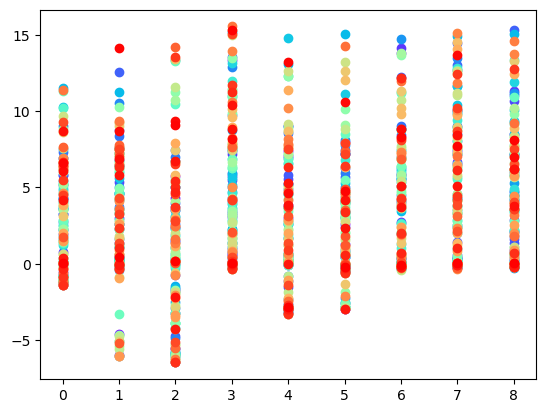

In [50]:
num_imgs = 150


colors = iter(cm.rainbow(np.linspace(0, 1, num_imgs)))

for i in range(num_imgs):
    arr = []
    for rowidx in range(len(dfs_arr[0][0])):
        if dfs_arr[0][0][rowidx] == i:
            arr.append(dfs_arr[0][2][rowidx])
    plt.scatter(range(len(arr)),arr, color = next(colors)) 

            
    


#plt.scatter(range(len(dfs_arr[0][0])),dfs_arr[0][2])

